# Using PyTorch to build, train, and test convolutional neural networks

## Agenda
*   Basic operations
  *    Convolution
  *    Activation
  *    Pooling
  *    Batch normalization
  *    Skip conection
  *    Linear
  *    Dropout
*   Loading and splitting a dataset  
*   Building a convolutional neural network
*   Defining loss function and optimizer
*   Training and testing
*   Saving and loading the model





## Basic operations

PyTorch has a module called `nn` that provides a lot of useful tools to build neural networks. This module defines most commonly used operations, such as convolution, pooling and activation. We will see how to use some of these operations using module `nn`: 

*   Convolution
*   Activation
*   Pooling
*   Batch normalization
*   Skip connection
*   Linear transformation (dense layer) 
*   Dropout

In [1]:
#import module nn
import torch
from torch import nn as nn

### Convolution

You must provide the number of input channels, the number of output channels (i.e., number of kernels), and the kernel sizes. To preserve image dimensions, you must provide the padding size. 

CLASS torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)

In [2]:
#it defines a convolution with 3 kernels of sizes 5 x 3
conv = nn.Conv2d(in_channels=2, out_channels=3, kernel_size=(5, 3), padding=(2,1))

The weights are stored in a tensor $K_{N, M, P, Q}$, such that
$N$ is the number of kernels, $M$ is the number of input channels, $P$ and $Q$ are the input dimensions (height, width). 



In [3]:
print(conv.weight.data.shape)

torch.Size([3, 2, 5, 3])


The input is a tensor $I_{B, M, P, Q}$, such that $B$ is the batch size, $M$ is the number of channels, and $P$ and $Q$ are the input dimensions (height, width). 

In [4]:
#creating a random input
x = torch.rand(1, 2, 10, 8)
print("x = ", x)
print(x.size())

x =  tensor([[[[0.8577, 0.8374, 0.5146, 0.9796, 0.3864, 0.7838, 0.4686, 0.2177],
          [0.3660, 0.4669, 0.5876, 0.2981, 0.4239, 0.6861, 0.1611, 0.1052],
          [0.8622, 0.8398, 0.8853, 0.0048, 0.3126, 0.6224, 0.3065, 0.9442],
          [0.4445, 0.5070, 0.1083, 0.0989, 0.1674, 0.5378, 0.8136, 0.8466],
          [0.6881, 0.4148, 0.1724, 0.6462, 0.9563, 0.7251, 0.8951, 0.0809],
          [0.1438, 0.5316, 0.2130, 0.8405, 0.0816, 0.5886, 0.9695, 0.1057],
          [0.1300, 0.2512, 0.2614, 0.4238, 0.0323, 0.0916, 0.4152, 0.4676],
          [0.3235, 0.3981, 0.6654, 0.0908, 0.2302, 0.6896, 0.7762, 0.9038],
          [0.3545, 0.9735, 0.1747, 0.2696, 0.6344, 0.9944, 0.8075, 0.7170],
          [0.3553, 0.0730, 0.2209, 0.2274, 0.2819, 0.0139, 0.2080, 0.3947]],

         [[0.2687, 0.2714, 0.2173, 0.6956, 0.3633, 0.0116, 0.8481, 0.6560],
          [0.7069, 0.9844, 0.2028, 0.4787, 0.6913, 0.2495, 0.8119, 0.5454],
          [0.7485, 0.1126, 0.8763, 0.1478, 0.6427, 0.9395, 0.9061, 0.1842],
     

In [5]:
#Convolving x with the three kernels that have already been randomly initialized
y_conv = conv(x)
print("y_conv = ", y_conv)
print(y_conv.shape)

y_conv =  tensor([[[[ 0.2089,  0.2189,  0.2478,  0.2595,  0.4414,  0.0527,  0.2505,
            0.1052],
          [ 0.1605,  0.1147,  0.2083,  0.0636,  0.2045,  0.1104,  0.1301,
            0.2506],
          [ 0.1361,  0.3889,  0.2390,  0.1086, -0.0339,  0.2075,  0.2213,
            0.6171],
          [ 0.0955,  0.1431,  0.2214, -0.1201,  0.1631,  0.2207,  0.2816,
            0.7332],
          [ 0.1968,  0.0968,  0.3050,  0.1920,  0.2916,  0.4483,  0.4335,
            0.3705],
          [ 0.2425,  0.1316,  0.2385,  0.0732,  0.0955,  0.0040,  0.2453,
            0.1517],
          [ 0.0833,  0.1373, -0.0175,  0.0875, -0.0084, -0.1293,  0.1580,
            0.2485],
          [ 0.1792,  0.4092, -0.1649,  0.1490,  0.3637,  0.1848,  0.3641,
            0.4370],
          [ 0.2588,  0.4192,  0.1084,  0.2617,  0.4999,  0.1766,  0.2865,
            0.5314],
          [ 0.0480,  0.3322,  0.1735,  0.1826,  0.2578,  0.0983,  0.0054,
            0.3682]],

         [[-0.0990, -0.0526, -0.0729, 

We can also set the kernel weights as we want.

In [6]:
#initializing weights and biases
conv.weight.data = torch.rand(3, 2, 5, 3, requires_grad=True) - 0.5
conv.bias.data   = torch.rand(3, requires_grad=True) - 0.5

In [7]:
#Convolving x with our new kernel bank of three kernels
y_conv = conv(x)
print("y_conv = ", y_conv)
print(y_conv.shape)

y_conv =  tensor([[[[ 2.7099e-01,  5.5210e-02, -4.1349e-01,  2.4742e-01, -5.0851e-02,
           -3.4976e-02, -6.8972e-01,  4.8553e-01],
          [-2.7221e-01,  3.5735e-01, -9.6674e-01, -1.0279e-01,  4.0941e-01,
           -6.9564e-02, -5.6096e-01,  1.6257e-01],
          [ 4.5101e-01, -5.0933e-01,  8.8519e-02, -7.7879e-01,  4.1972e-01,
            2.9510e-01,  1.6181e-01,  2.5107e-01],
          [-4.1760e-02, -4.0352e-01, -1.2313e-01,  5.0757e-01, -1.1432e+00,
           -1.0497e-01,  8.4762e-02,  5.5398e-01],
          [-5.3484e-01,  4.5153e-01,  2.6426e-02,  3.8083e-01, -9.0981e-01,
           -1.9965e-01, -5.2416e-01, -2.6102e-01],
          [-5.7825e-01,  7.5078e-02,  3.2126e-01, -1.3460e-01, -6.3642e-01,
           -3.0126e-02,  2.3127e-01, -2.7968e-01],
          [-1.2863e-01,  4.6322e-01, -5.3235e-01, -1.0915e-01, -4.5613e-01,
            5.9516e-02,  1.7571e-01, -1.9384e-01],
          [ 8.0860e-01, -8.5147e-02, -4.2017e-03,  3.6157e-01, -1.3470e-01,
           -2.0794e-02, -


### Activation

Now we define a ReLU activation function.

CLASS torch.nn.ReLU(inplace=False)

In [8]:
#defining relu function

relu = nn.ReLU()

In [9]:
#applying the relu function to output of a convolution
y_relu = relu(y_conv)
print("y_relu = ",y_relu)

y_relu =  tensor([[[[0.2710, 0.0552, 0.0000, 0.2474, 0.0000, 0.0000, 0.0000, 0.4855],
          [0.0000, 0.3574, 0.0000, 0.0000, 0.4094, 0.0000, 0.0000, 0.1626],
          [0.4510, 0.0000, 0.0885, 0.0000, 0.4197, 0.2951, 0.1618, 0.2511],
          [0.0000, 0.0000, 0.0000, 0.5076, 0.0000, 0.0000, 0.0848, 0.5540],
          [0.0000, 0.4515, 0.0264, 0.3808, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0751, 0.3213, 0.0000, 0.0000, 0.0000, 0.2313, 0.0000],
          [0.0000, 0.4632, 0.0000, 0.0000, 0.0000, 0.0595, 0.1757, 0.0000],
          [0.8086, 0.0000, 0.0000, 0.3616, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.5502, 0.0000, 0.2435, 0.3135, 0.3651, 0.0000, 0.3048],
          [0.0000, 0.5457, 0.0000, 0.0000, 0.4983, 0.0000, 0.0000, 0.7724]],

         [[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],


### Pooling

We may define now max poolin. Note that strides greater than 1 will reduce the input size. 

CLASS torch.nn.MaxPool2d(kernel_size, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False)

In [10]:
pool = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)

In [11]:
#applying max pooling to output of ReLu
y_pool = pool(y_relu)
print("y_pool = ", y_pool)
print(y_pool.shape)

y_pool =  tensor([[[[0.3574, 0.3574, 0.3574, 0.4094, 0.4094, 0.4094, 0.4855, 0.4855],
          [0.4510, 0.4510, 0.3574, 0.4197, 0.4197, 0.4197, 0.4855, 0.4855],
          [0.4510, 0.4510, 0.5076, 0.5076, 0.5076, 0.4197, 0.5540, 0.5540],
          [0.4515, 0.4515, 0.5076, 0.5076, 0.5076, 0.4197, 0.5540, 0.5540],
          [0.4515, 0.4515, 0.5076, 0.5076, 0.5076, 0.2313, 0.5540, 0.5540],
          [0.4632, 0.4632, 0.4632, 0.3808, 0.3808, 0.2313, 0.2313, 0.2313],
          [0.8086, 0.8086, 0.4632, 0.3616, 0.3616, 0.2313, 0.2313, 0.2313],
          [0.8086, 0.8086, 0.5502, 0.3616, 0.3651, 0.3651, 0.3651, 0.3048],
          [0.8086, 0.8086, 0.5502, 0.4983, 0.4983, 0.4983, 0.7724, 0.7724],
          [0.5502, 0.5502, 0.5502, 0.4983, 0.4983, 0.4983, 0.7724, 0.7724]],

         [[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],


### Batch normalization

Now we may define batch normalization to normalize batches in the following way $$y = \frac{x - \mathbb{E}[x]}{\sqrt{\mathrm{Var}[x]}}\gamma + \beta.$$ You must indicate the number of input channels.


CLASS torch.nn.BatchNorm1d(num_features, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True, device=None, dtype=None)

In [12]:
#defining batch normalization layer: affine=False indicates without learnable parameters. 
norm = nn.BatchNorm2d(num_features=3, affine=False)

In [13]:
#applying batch normalization
y_norm = norm(y_pool)
print("y_norm = ", y_norm)

y_norm =  tensor([[[[-0.8529, -0.8529, -0.8529, -0.4981, -0.4981, -0.4981,  0.0206,
            0.0206],
          [-0.2147, -0.2147, -0.8529, -0.4279, -0.4279, -0.4279,  0.0206,
            0.0206],
          [-0.2147, -0.2147,  0.1708,  0.1708,  0.1708, -0.4279,  0.4870,
            0.4870],
          [-0.2111, -0.2111,  0.1708,  0.1708,  0.1708, -0.4279,  0.4870,
            0.4870],
          [-0.2111, -0.2111,  0.1708,  0.1708,  0.1708, -1.7121,  0.4870,
            0.4870],
          [-0.1315, -0.1315, -0.1315, -0.6929, -0.6929, -1.7121, -1.7121,
           -1.7121],
          [ 2.2220,  2.2220, -0.1315, -0.8241, -0.8241, -1.7121, -1.7121,
           -1.7121],
          [ 2.2220,  2.2220,  0.4612, -0.8241, -0.8003, -0.8003, -0.8003,
           -1.2112],
          [ 2.2220,  2.2220,  0.4612,  0.1079,  0.1079,  0.1079,  1.9757,
            1.9757],
          [ 0.4612,  0.4612,  0.4612,  0.1079,  0.1079,  0.1079,  1.9757,
            1.9757]],

         [[ 0.0000,  0.0000,  0.0000, 

### Skip connection

To skip layers without passing through previus layers, we may concatenate the output of two layers along a given axis. For instance, we may concatenate the input and output of relu as follows.

torch.cat(tensors, dim=0, *, out=None) → Tensor

In [14]:
#concatenating tensors
concat = torch.cat((x, y_relu), dim=1)
print("concat = ", concat)
print(concat.shape)

concat =  tensor([[[[0.8577, 0.8374, 0.5146, 0.9796, 0.3864, 0.7838, 0.4686, 0.2177],
          [0.3660, 0.4669, 0.5876, 0.2981, 0.4239, 0.6861, 0.1611, 0.1052],
          [0.8622, 0.8398, 0.8853, 0.0048, 0.3126, 0.6224, 0.3065, 0.9442],
          [0.4445, 0.5070, 0.1083, 0.0989, 0.1674, 0.5378, 0.8136, 0.8466],
          [0.6881, 0.4148, 0.1724, 0.6462, 0.9563, 0.7251, 0.8951, 0.0809],
          [0.1438, 0.5316, 0.2130, 0.8405, 0.0816, 0.5886, 0.9695, 0.1057],
          [0.1300, 0.2512, 0.2614, 0.4238, 0.0323, 0.0916, 0.4152, 0.4676],
          [0.3235, 0.3981, 0.6654, 0.0908, 0.2302, 0.6896, 0.7762, 0.9038],
          [0.3545, 0.9735, 0.1747, 0.2696, 0.6344, 0.9944, 0.8075, 0.7170],
          [0.3553, 0.0730, 0.2209, 0.2274, 0.2819, 0.0139, 0.2080, 0.3947]],

         [[0.2687, 0.2714, 0.2173, 0.6956, 0.3633, 0.0116, 0.8481, 0.6560],
          [0.7069, 0.9844, 0.2028, 0.4787, 0.6913, 0.2495, 0.8119, 0.5454],
          [0.7485, 0.1126, 0.8763, 0.1478, 0.6427, 0.9395, 0.9061, 0.1842],


### Linear

Dense layers can be implemented by flattening output activations followed by a linear transformation. We must indicate the input and output sizes.

torch.flatten(input, start_dim=0, end_dim=-1) → Tensor

CLASS torch.nn.Linear(in_features, out_features, bias=True, device=None, dtype=None)

In [15]:
#transforming it into a 2D tensor
y_flatten = y_pool.flatten(start_dim=1)
print(y_flatten.shape)

torch.Size([1, 240])


In [16]:
#defining the linear layer
linear = nn.Linear(in_features=240, out_features=2, bias=True)

In [17]:
#applying linear the transformation
y_linear = linear(y_flatten)
print(y_linear)
print(y_linear.shape)

tensor([[0.1234, 0.2046]], grad_fn=<AddmmBackward0>)
torch.Size([1, 2])


### Dropout

For regularization, we may also add a dropout layer to randomly disconsider elements of the input tensor (it sets zeroes) with probability p by following a Bernoulli distribution. The outputs are scaled by a factor $\frac{1}{1-p}$ during training. 

CLASStorch.nn.Dropout(p=0.5, inplace=False)

In [18]:
drop = nn.Dropout(0.5)

In [19]:
x = torch.randn((5,5))

In [20]:
y = drop(x)

In [21]:
print("Before dropout: ", x)

Before dropout:  tensor([[-1.4385,  1.3806,  0.7608,  0.8161, -0.2248],
        [-1.2233, -1.2800, -1.5703, -0.1287, -1.3774],
        [-0.5469, -1.0448,  0.0061,  0.9676, -0.4840],
        [-0.3061,  0.8120,  0.9713, -0.5200, -2.0109],
        [ 0.1925,  1.6514,  0.8017,  1.1456, -1.7756]])


In [22]:
print("After dropout", y)

After dropout tensor([[-2.8770,  0.0000,  1.5217,  1.6321, -0.0000],
        [-0.0000, -0.0000, -0.0000, -0.2574, -2.7549],
        [-0.0000, -0.0000,  0.0122,  1.9351, -0.9680],
        [-0.0000,  0.0000,  0.0000, -1.0401, -4.0217],
        [ 0.3850,  3.3027,  0.0000,  2.2912, -3.5512]])


# Building a CNN for fashion mnist

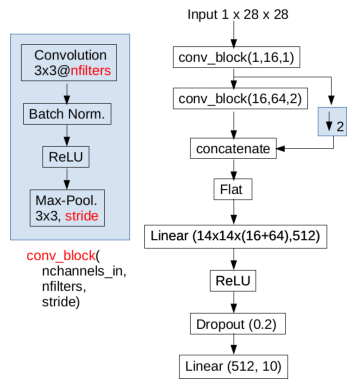

In [23]:
import matplotlib.pyplot as plt

fig = plt.imread('./figs/fmnist.png')
plt.imshow(fig)
plt.axis("off")
plt.show()

### Loading the Dataset

In [24]:
#import modules to manipulate data
from torch.utils.data import DataLoader, random_split
from torchvision import datasets
from torchvision import transforms
# important to report the training results
from torch_snippets.torch_loader import Report

In [25]:
#define transformations between brackets to apply on the dataset images. For instance, convert them into tensors.
transformations = transforms.Compose([transforms.ToTensor()]) 

#### You may load training and test images separately or

In [26]:
#training_set = datasets.FashionMNIST(
#    root="./images",
#    train=True,
#    download=True,
#    transform=transformations
#)

#test_set = datasets.FashionMNIST(
#    root="./images",
#    train=False,
#    download=True,
#    transform=transformations
#)

#### you may download the training set and split it as you wish.

In [27]:
data_set = datasets.FashionMNIST(
    root="./images",
    train=True,
    download=True,
    transform=transformations
)

In [28]:
#divide the dataset randomly into train, valid, and test sets. 
trainset, validset, testset = random_split(data_set, [30000, 15000, 15000])

### Visualizing training images

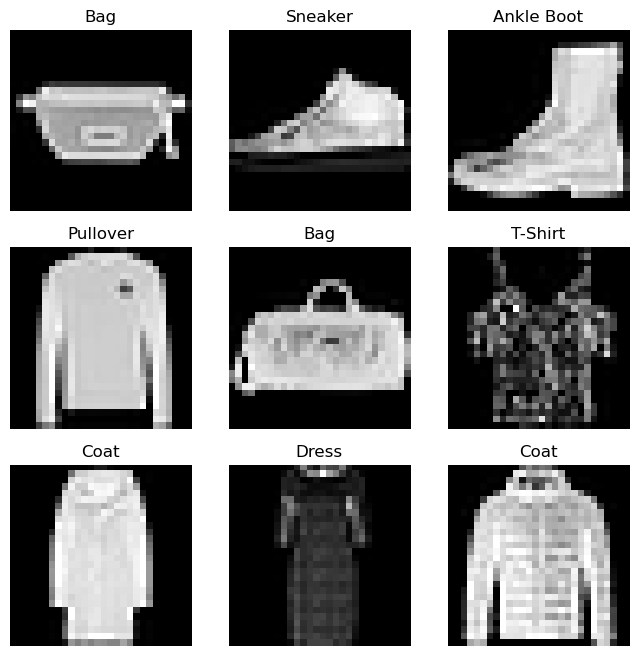

In [29]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(trainset), size=(1,)).item()
    img, label = trainset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### Defining Dataloaders

A dataloader divides a dataset into batches for iteration. Each iteration returns the next batch of train_features and train_labels (containing batch_size=64 features and labels, for instance). By specifying shuffle=True, after we iterate over all batches the dataset is shuffled (this is important to avoid overfitting when training a NN).

DataLoader(dataset, batch_size=1, shuffle=False, sampler=None,
           batch_sampler=None, num_workers=0, collate_fn=None,
           pin_memory=False, drop_last=False, timeout=0,
           worker_init_fn=None, *, prefetch_factor=2,
           persistent_workers=False)

In [30]:
#defining dataloader that will generate batches with 64 images at random 
trainload = DataLoader(trainset, batch_size=64, shuffle=True)
testload  = DataLoader(testset, batch_size=64, shuffle=True)
validload = DataLoader(validset, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Label batch shape: torch.Size([64])


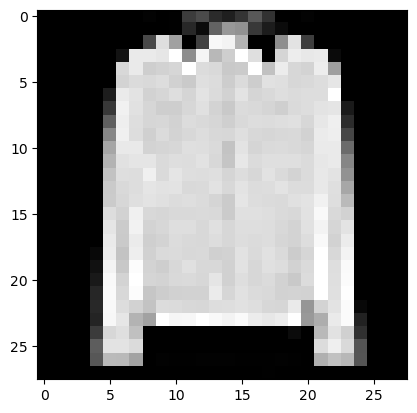

Label: 4 Object: Coat


In [31]:
# For instance, you can access a batch and display image and label of its first sample.

train_features, train_labels = next(iter(trainload)) # returns a batch
print("Feature batch shape: {}".format(train_features.shape)) # prints the shape of the features
print("Label batch shape: {}".format(train_labels.shape)) # prints the shape of the labels
img   = train_features[16].squeeze() # returns the first image
label = train_labels[16] # returns its label
plt.imshow(img, cmap="gray") # shows image and label
plt.show()
print("Label: {} Object: {}".format(label.item(), labels_map[label.item()]))

### Defining our CNN model

In [32]:
import math

In [33]:
# a convolutional block
def conv_block(nchannels_in, nchannels_out, stride_val):
    return nn.Sequential(
        #defining convolutional layer 
        nn.Conv2d(in_channels=nchannels_in, out_channels=nchannels_out, kernel_size=(3, 3),
                  stride=1, padding=1, bias=False),
        #defining a batch normalization layer
        nn.BatchNorm2d(num_features=nchannels_out),
        #defining activation layer
        nn.ReLU(),
        #defining a pooling layer
        nn.MaxPool2d(kernel_size=(3, 3), stride=stride_val, padding=1)
    )
  
# Note that some operations, such as skip connection and downsampling, can be done in the forward method
class FMNISTNet(nn.Module):

    def __init__(self, num_classes):
        super(FMNISTNet, self).__init__()
        
        #define the first conv_block
        self.conv1 = conv_block(1,16,1)
        
        #defining the second conv_block
        self.conv2 = conv_block(16,64,2)                      
        
        #defining classifier
        self.classifier = nn.Sequential(
            #defining linear layer
            nn.Linear(in_features=int((28*28*(16+64))/(2*2)), out_features=512, bias=True),
            #defining activation layer
            nn.ReLU(),
            # defining a dropout layer
            nn.Dropout(0.2),
            #defining linear layer as decision layer
            nn.Linear(512, num_classes) #Note that you do not need nn.Softmax in torch
        )

        #initialize weights
        self._initialize_weights()

    def forward(self, x):
        #extracts features
        x1      = self.conv1(x)
        x2      = self.conv2(x1)
        #resizes x1 to have the same size of x2. See other operations in functional.
        x1      = torch.nn.functional.interpolate(x1, scale_factor=(0.5, 0.5), mode='nearest',
                                                  recompute_scale_factor=True)
        #performs skip connection 
        x       = torch.cat((x1, x2), dim=1)
    
        #transforms outputs into a 2D tensor
        x = torch.flatten(x, start_dim=1)

        #classifies features
        y = self.classifier(x)
  
        return y
  
    # Same as Xavier: nn.init.xavier_normal_()
    def _initialize_weights(self):
        #for each submodule of our network
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                #get the number of elements in the layer weights
                n = m.kernel_size[0] * m.kernel_size[1] * m.in_channels

                #initialize layer weights with random values generated from a normal
                #distribution with mean = 0 and std = sqrt(2. / n))
                m.weight.data.normal_(mean=0, std=math.sqrt(2. / n))

                if m.bias is not None:
                    #initialize bias with 0 
                    m.bias.data.zero_()
            elif isinstance(m, nn.Linear):
                #initialize layer weights with random values generated from a normal
                #distribution with mean = 0 and std = 1/100
                m.weight.data.normal_(mean=0, std=0.01)
                if m.bias is not None:
                #initialize bias with 0 
                    m.bias.data.zero_()

### Defining a device and creating the model

In [34]:
#is GPU available?
gpu = torch.cuda.is_available()

#defining device where to to the computation
device = torch.device(0) if gpu else torch.device('cpu')

In [35]:
#creating the model to a dataset with 10 classes and moving it to the correct device
model = FMNISTNet(num_classes=10).to(device)

### Show the summary of the model

In [36]:
from torchsummary import summary

summary(model,(1,28,28)) # FMNIST contains 28x28 images with 1 channel

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             144
       BatchNorm2d-2           [-1, 16, 28, 28]              32
              ReLU-3           [-1, 16, 28, 28]               0
         MaxPool2d-4           [-1, 16, 28, 28]               0
            Conv2d-5           [-1, 64, 28, 28]           9,216
       BatchNorm2d-6           [-1, 64, 28, 28]             128
              ReLU-7           [-1, 64, 28, 28]               0
         MaxPool2d-8           [-1, 64, 14, 14]               0
            Linear-9                  [-1, 512]       8,028,672
             ReLU-10                  [-1, 512]               0
          Dropout-11                  [-1, 512]               0
           Linear-12                   [-1, 10]           5,130
Total params: 8,043,322
Trainable params: 8,043,322
Non-trainable params: 0
---------------------------

### Show the trainable parameters: weights and bias

In [37]:
params = list(model.parameters())
print(len(params))
print(params[0][0]) # random weights of the first filter of the convolutional layer
print(params[1][0]) # the bias of that filter

10
tensor([[[ 0.6233, -0.1854,  0.5630],
         [ 0.1609,  0.8201,  0.4322],
         [-0.0623,  0.8631,  0.2406]]], device='cuda:0',
       grad_fn=<SelectBackward0>)
tensor(1., device='cuda:0', grad_fn=<SelectBackward0>)


### Loss function

We use the cross entropy as loss function, which combines softmax and cross entropy.

CLASS torch.nn.CrossEntropyLoss(weight=None, size_average=None, ignore_index=-100, reduce=None, reduction='mean')

In [38]:
def Criterion(preds, targets):
    ce            = nn.CrossEntropyLoss().to(device)
    loss          = ce(preds, targets.long()) 
    pred_labels   = torch.max(preds, 1)[1] # same as argmax
    acc           = torch.sum(pred_labels == targets.data)
    n             = pred_labels.size(0)
    acc           = acc/n
    return loss, acc


criterion = Criterion

### Optimizer

PyTorch has many optimization algorithms. Here we are going to use the Stochastic Gradient Descent.

In [39]:
#import module that defines the optimizer
import torch.optim as optim

To create a optimizer, we need to set a learning rate, a momentum, a weight_decay (L2 regularization).

CLASS torch.optim.SGD(params, lr=<required parameter>, momentum=0, dampening=0, weight_decay=0, nesterov=False)

In [40]:
#defining optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.85, weight_decay=0.0001)

We can use a learning rate scheduler that can update the learning rate during training. Here we will use a scheduler that multiply the learning rate by a factor $\gamma$ at every $25$ epochs: e.g., lr=0.5, 0.05, 0.005...

CLASS torch.optim.lr_scheduler.StepLR(optimizer, step_size, gamma=0.1, last_epoch=-1, verbose=False)


In [41]:
#defining learning rate scheduler
lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=25, gamma=0.1)

### Defining training and validation/test functions

In [42]:
def train_batch(model, data, optimizer, criterion, device):
    model.train()
    ims, targets = data
    ims     = ims.to(device=device)
    targets = targets.to(device=device)
    preds   = model(ims)
    loss, acc = criterion(preds, targets)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    return loss.item(), acc.item()

@torch.no_grad()
def validate_batch(model, data, criterion, device):
    model.eval()
    ims, targets = data
    ims     = ims.to(device=device)
    targets = targets.to(device=device)
    preds   = model(ims)
    loss, acc = criterion(preds, targets)
    return loss.item(), acc.item()
            

### Training your model

In [43]:
# initializing variables
n_epochs = 40
log      = Report(n_epochs)

# starting training and validation
for ex in range(n_epochs):
    N = len(trainload)
    for bx, data in enumerate(trainload):
        loss, acc = train_batch(model, data, optimizer, criterion, device)
        #report results for the batch
        log.record((ex+(bx+1)/N), trn_loss=loss, trn_acc=acc, end='\r')

    N = len(validload)
    for bx, data in enumerate(validload):
        loss, acc = validate_batch(model, data, criterion, device)
        log.record((ex+(bx+1)/N), val_loss=loss, val_acc=acc, end='\r')

    if (ex+1) % 10 == 0: log.report_avgs(ex+1)
    #count epochs for auto-adjusting the learning rate
    lr_scheduler.step()

EPOCH: 10.000  trn_acc: 0.937  val_acc: 0.910  val_loss: 0.264  trn_loss: 0.163  (49.95s - 149.86s remaining)
EPOCH: 20.000  trn_acc: 0.977  val_acc: 0.918  val_loss: 0.301  trn_loss: 0.062  (97.85s - 97.85s remaining)
EPOCH: 30.000  trn_acc: 0.997  val_acc: 0.923  val_loss: 0.322  trn_loss: 0.012  (147.53s - 49.18s remaining)
EPOCH: 40.000  trn_acc: 0.998  val_acc: 0.924  val_loss: 0.337  trn_loss: 0.009  (195.73s - 0.00s remaining)


### Plot the results

100%|████████████████████████████████████████| 141/141 [00:00<00:00, 368.93it/s]


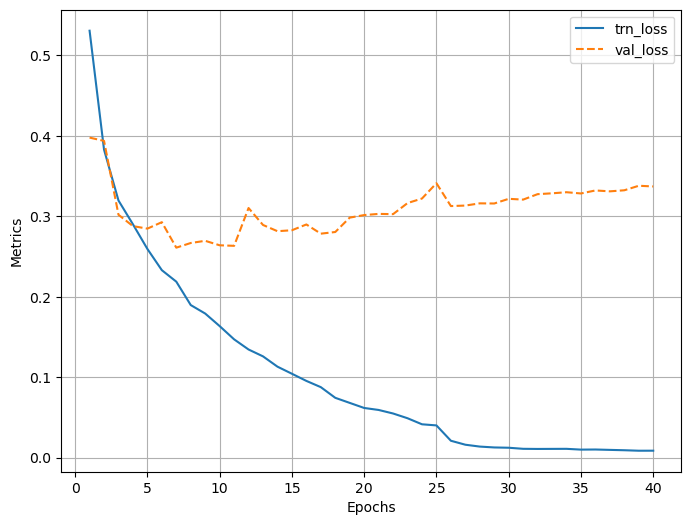

100%|████████████████████████████████████████| 141/141 [00:00<00:00, 358.21it/s]


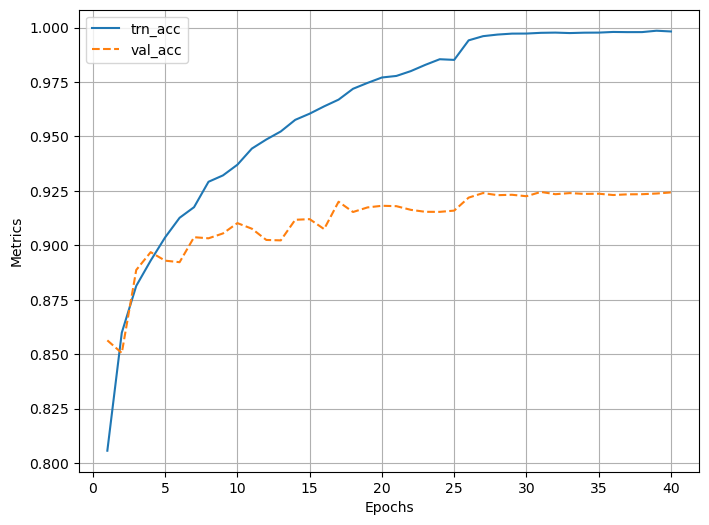

In [44]:
log.plot_epochs(['trn_loss','val_loss'])
log.plot_epochs(['trn_acc','val_acc'])

### Test your model

In [45]:
def Test(model, testload, criterion, device):
    N = len(testload)
    mean_loss = 0
    mean_acc  = 0
    for bx, data in enumerate(testload):
        loss, acc  = validate_batch(model, data, criterion, device)
        mean_loss += loss
        mean_acc  += acc
    
    mean_loss = mean_loss / N
    mean_acc  = mean_acc / N
    return(mean_loss, mean_acc)




In [46]:
(mean, acc) = Test(model, testload, criterion, device)
print('Loss: {:.6f} Acc: {:.6f}'.format(mean,acc))

Loss: 0.353638 Acc: 0.924601


### Save and load your model

In [47]:
# Save the tensors in the CPU format rather than in the GPU format to facilitate loading them later. It
# does not save the architecture of the model, so the class of the model is required to load it later. 
torch.save(model.to('cpu').state_dict(), 'FMNistCNN.pth')
#model.load_state_dict(torch.load('FMNistCNN.pth'))

#### Exercise: The model is overfitted. Play with datasets' sizes, network architecture, and hiperparameters to improve results without overfitting or underfitting.